# **Generating large intense plots used in 2023 symposium presentation**

## 1) Start with our imports:

### The cell below contains imports needed for data visualization and manipulation

In [1]:
import numpy as np
import pandas as pd
import soundfile as sf
import matplotlib.pyplot as plt
from pytz import timezone

from pathlib import Path

### The cell below contains imports and `sys.path.append()` to provide access rights to the needed scripts

In [2]:
import sys

# # append the path of the
# # parent directory
sys.path.append('..')
sys.path.append('../src/')
sys.path.append('../src/models/bat_call_detector/batdetect2/')

### The cell below contains imports for the subsampling scripts. The main function demonstrated is `plt_msds_fromdf()`

In [3]:
import src.subsampling as ss

## 2) Generating figures below:

### a) Below we plot figures referencing our presentation's main example recording

#### i) Load in the recording collected by our Audiomoth, deployed in our UBNA Central Pond location on 8/26/2022 at 9:30pm PST

In [4]:
input_dir = f'{Path.home()}/Documents/Research/Symposium/Recordings/recover-20220828/UBNA_010'
summer_audio_files = sorted(list(Path(input_dir).iterdir()))
date = "20220826"
location = "Central Pond"
plot_file_path = summer_audio_files[3]
plot_file = plot_file_path.name
plot_file_path
offset = 1800
audio_file = sf.SoundFile(plot_file_path)
fs = audio_file.samplerate
reftimes = np.array([0, 600])
times = np.array([0, reftimes[1] - reftimes[0]])
audio_file.seek(int(reftimes[0]*fs))
audio_sec = audio_file.read(int((reftimes[1] - reftimes[0])*fs))

#### ii) First, we plot the entire audio signal along with its spectrograms with the detections overlayed
This plot is used in slide 16.
Because the entire signal is difficult to plot, we are only plotting 20min of the signal for all plots using the `reftimes` variable
- 1200 is the # of seconds in 20 minutes. Change this to 1800 in line 11 in the above cell to get all 30min. This may take a while to plot however.

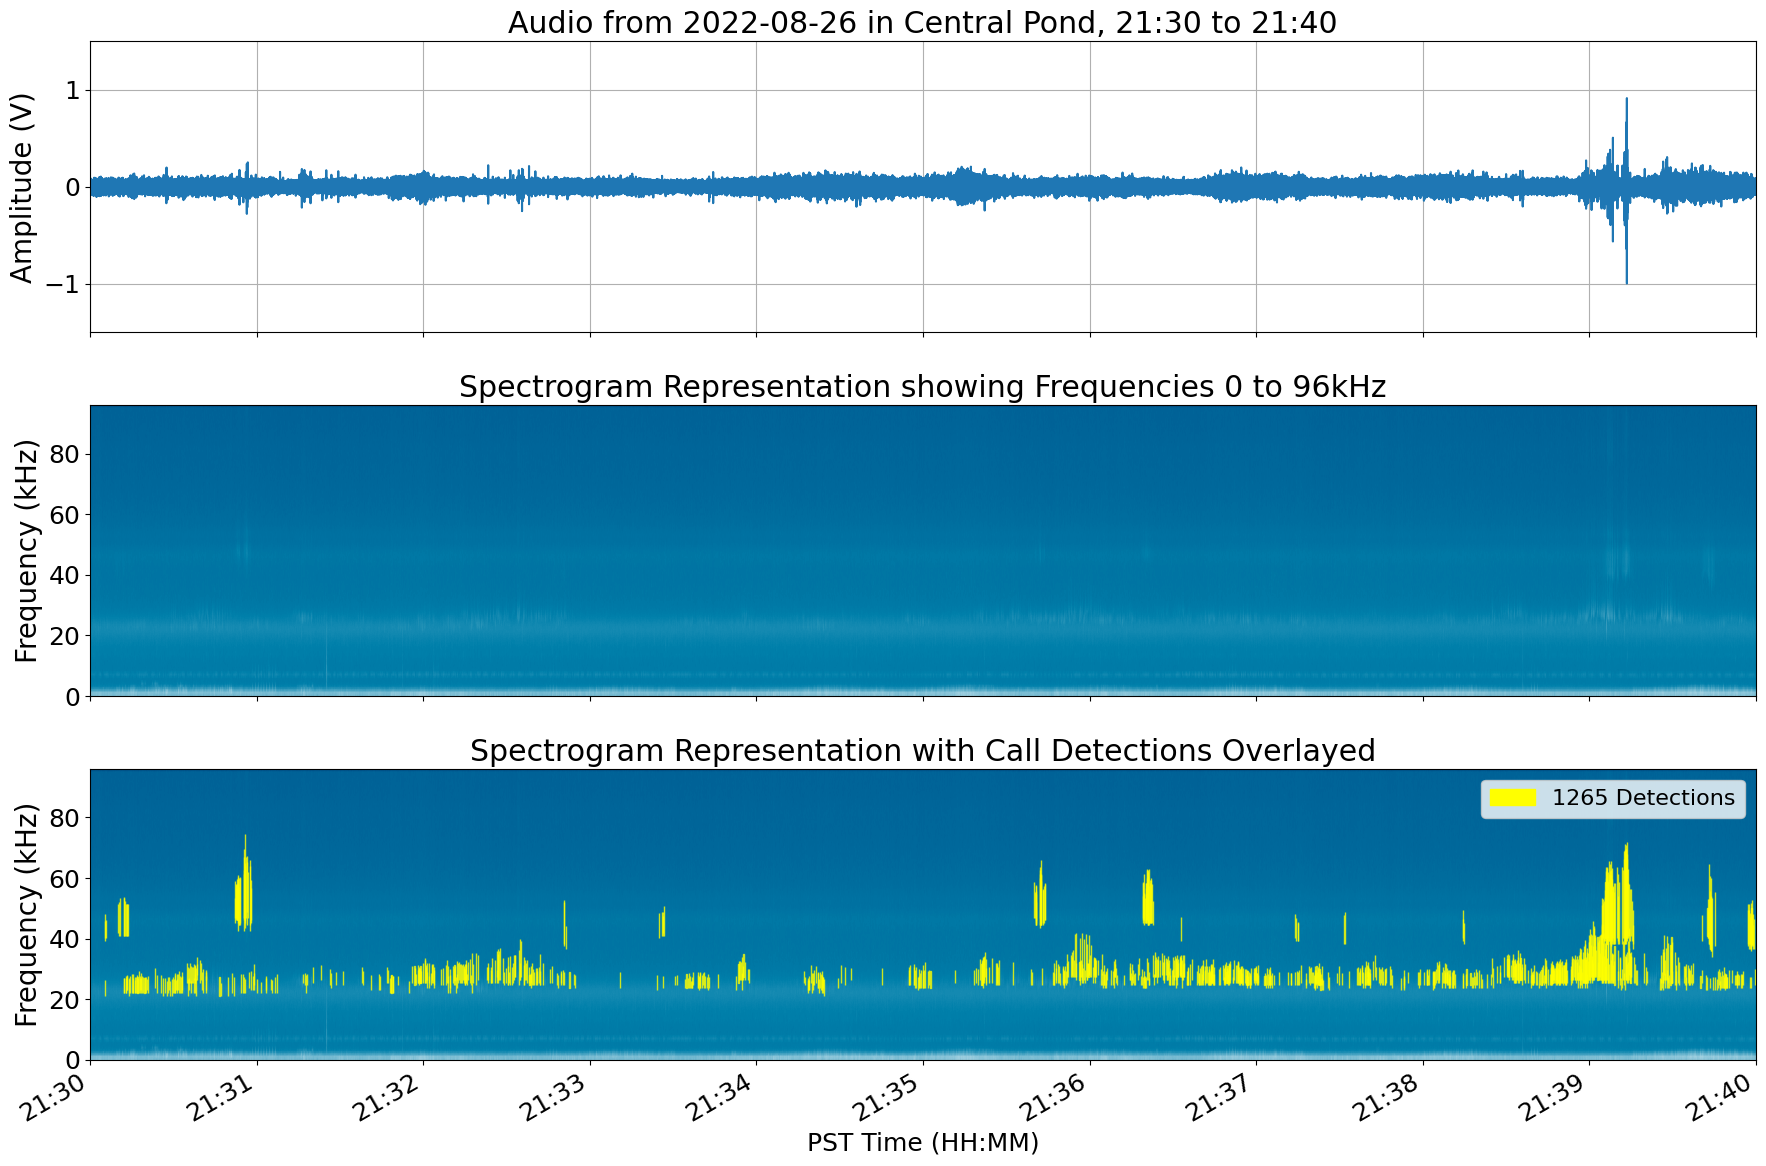

In [5]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times
plt.rcParams.update({'font.size': 18})

cycle_length = 1800
percent_on = 1.0
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=False, show_PST=True, show_legend=True, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=True, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)

#### iii) Next, we plot the audio signal's spectrograms with the simulated subsampling schemes overlayed to show what is processed for each scheme

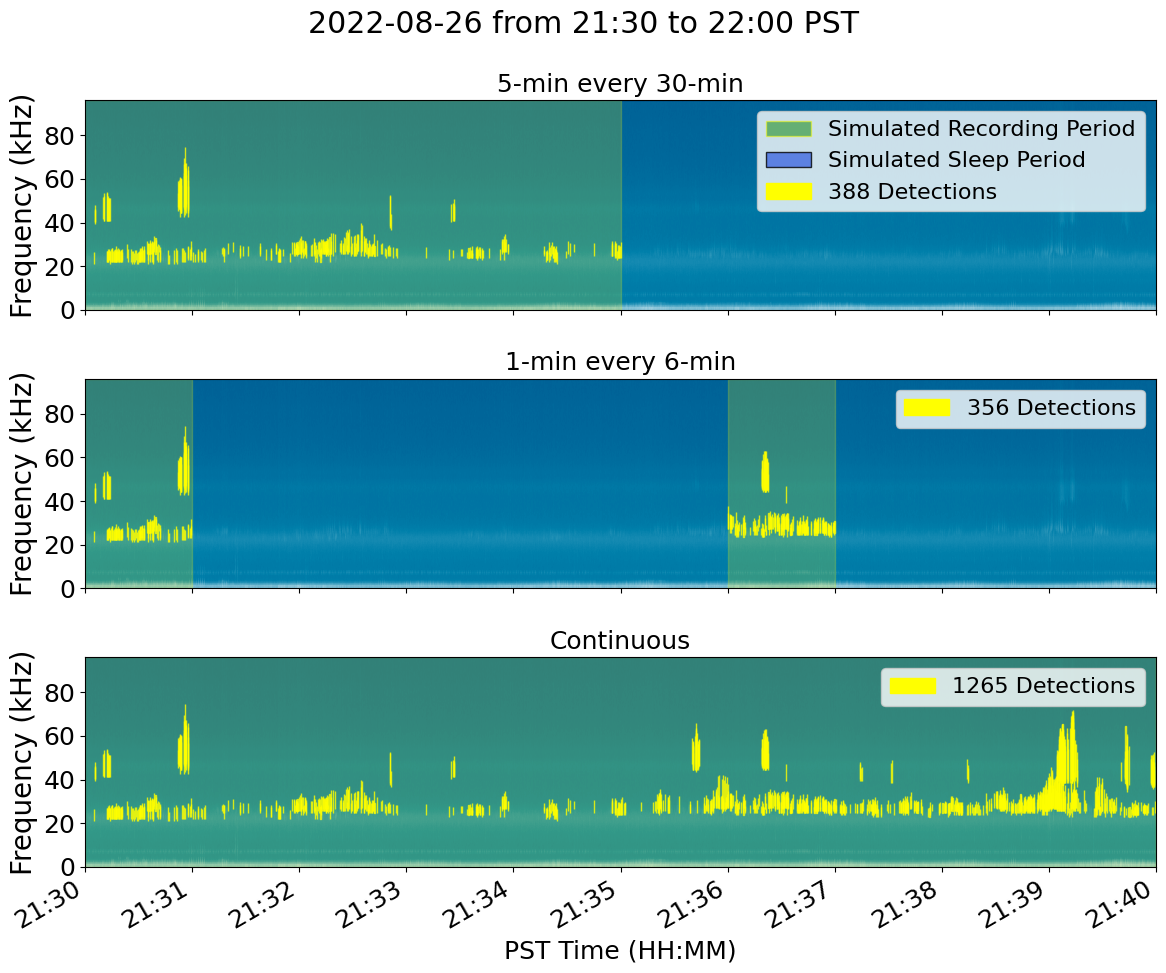

In [6]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

plt.figure(figsize=(12, 10))

cycle_length = 1800
percent_on = 0.167
dets = pd.read_csv(f"../output_dir/{int(cycle_length*percent_on)//60}min_every_{cycle_length//60}min__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = dets[dets['input_file']==plot_file]
plt.suptitle(f"2022-08-26 from 21:30 to 22:00 PST")
plt.subplot(311)
plt.title("5-min every 30-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=True, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, 80000, 5), np.linspace(0, 80, 5).astype('int'))

cycle_length = 360
percent_on = 0.167
dets2 = pd.read_csv(f"../output_dir/{int(cycle_length*percent_on)//60}min_every_{cycle_length//60}min__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = dets2[dets2['input_file']==plot_file]
plt.subplot(312)
plt.title("1-min every 6-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=True, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, 80000, 5), np.linspace(0, 80, 5).astype('int'))

cycle_length = 1800
percent_on = 1.0
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
plt.subplot(313)
plt.title("Continuous", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=True, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, 80000, 5), np.linspace(0, 80, 5).astype('int'))

plt.tight_layout()
plt.show()

#### iv) Next, we plot only the high-frequency bat call detections on the above plot with a threshold displayed to show why we chose this

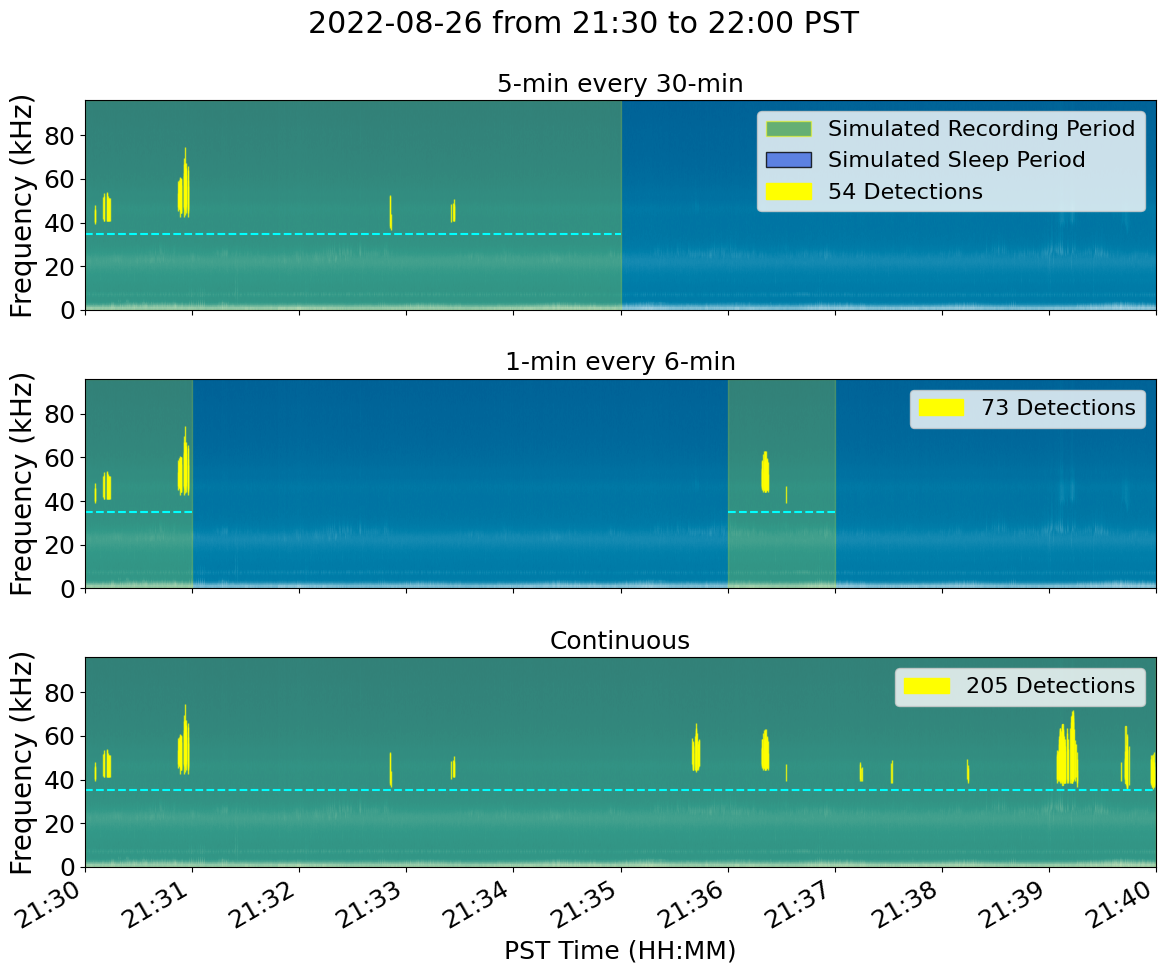

In [7]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

plt.figure(figsize=(12, 10))

cycle_length = 1800
percent_on = 0.167
dets = pd.read_csv(f"../output_dir/{int(cycle_length*percent_on)//60}min_every_{cycle_length//60}min__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = dets[dets['input_file']==plot_file]
hf_plot_dets = plot_dets.loc[plot_dets['low_freq'] > 35000]
plt.suptitle(f"2022-08-26 from 21:30 to 22:00 PST")
plt.subplot(311)
plt.title("5-min every 30-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, hf_plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=True, show_threshold=True, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, 80000, 5), np.linspace(0, 80, 5).astype('int'))

cycle_length = 360
percent_on = 0.167
dets2 = pd.read_csv(f"../output_dir/{int(cycle_length*percent_on)//60}min_every_{cycle_length//60}min__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = dets2[dets2['input_file']==plot_file]
hf_plot_dets = plot_dets.loc[plot_dets['low_freq'] > 35000]
plt.subplot(312)
plt.title("1-min every 6-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, hf_plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=True, lf_threshold=45000, hf_threshold=35000, show_num_dets=True, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, 80000, 5), np.linspace(0, 80, 5).astype('int'))

cycle_length = 1800
percent_on = 1.0
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
hf_plot_dets = plot_dets.loc[plot_dets['low_freq'] > 35000]
plt.subplot(313)
plt.title("Continuous", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, hf_plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=True, lf_threshold=45000, hf_threshold=35000, show_num_dets=True, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, 80000, 5), np.linspace(0, 80, 5).astype('int'))

plt.tight_layout()
plt.show()

#### v) Finally, we remove the threshold to just show the detections. The threshold served its purpose

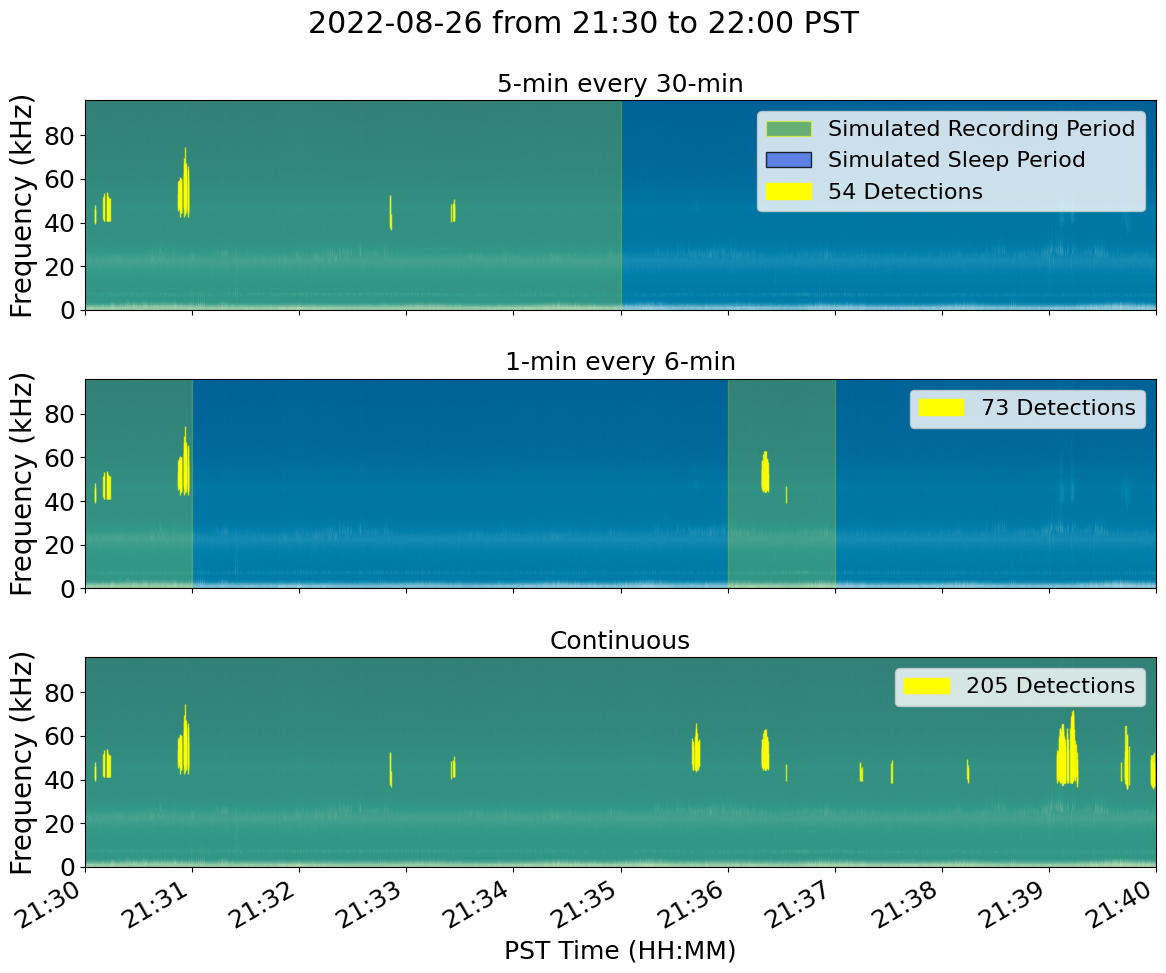

In [8]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

plt.figure(figsize=(12, 10))

cycle_length = 1800
percent_on = 0.167
dets = pd.read_csv(f"../output_dir/{int(cycle_length*percent_on)//60}min_every_{cycle_length//60}min__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = dets[dets['input_file']==plot_file]
hf_plot_dets = plot_dets.loc[plot_dets['low_freq'] > 35000]
plt.suptitle(f"2022-08-26 from 21:30 to 22:00 PST")
plt.subplot(311)
plt.title("5-min every 30-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, hf_plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=True, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, 80000, 5), np.linspace(0, 80, 5).astype('int'))

cycle_length = 360
percent_on = 0.167
dets2 = pd.read_csv(f"../output_dir/{int(cycle_length*percent_on)//60}min_every_{cycle_length//60}min__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = dets2[dets2['input_file']==plot_file]
hf_plot_dets = plot_dets.loc[plot_dets['low_freq'] > 35000]
plt.subplot(312)
plt.title("1-min every 6-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, hf_plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=True, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, 80000, 5), np.linspace(0, 80, 5).astype('int'))

cycle_length = 1800
percent_on = 1.0
c_dets = pd.read_csv(f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv")
plot_dets = c_dets[c_dets['input_file']==plot_file]
hf_plot_dets = plot_dets.loc[plot_dets['low_freq'] > 35000]
plt.subplot(313)
plt.title("Continuous", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, hf_plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=True, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, 80000, 5), np.linspace(0, 80, 5).astype('int'))

plt.tight_layout()
plt.show()